In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import shap

%run ../../helper/preprocess.py
%run ../../helper/aggregate.py
%run ../../helper/utils.py
%run shap_analysis.py

shap.initjs()
matplotlib.rcParams['pdf.fonttype'] = 42
sns.set(font_scale=2.4)
sns.set_style("white")

In [2]:
metrics_file = '../../metrics/ddim_sd15_metrics.csv'
config_file = '../../../exp_configs/config_mapping.csv'

keywords_to_exclude = ['1027', '1007', '1017', ]
# keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    rank=True,
    metrics_to_include=None,
    keywords_to_exclude=keywords_to_exclude)

In [3]:
keywords_to_exclude = ['1003', '1013', '1023']
metrics_processed = metrics_processed[metrics_processed['Config'].apply(
    lambda x: not any(keyword in x for keyword in keywords_to_exclude))]
print(metrics_processed.shape)

(8073, 82)


In [4]:
8424/39/9

24.0

## Per category: People

In [5]:
category = 'people'

metrics_aggregated = aggregate_metrics(
    metrics_processed[metrics_processed['Category'] == category],
    level='All',
    group_seeds=False)
print(metrics_aggregated.shape)

(207, 149)


In [6]:
metric_types = ['Image Similarity', 'Text Similarity', 'Vendi']
encoders = ['DINOv2', 'CLIP', 'DINOv2', 'Vgg19']
modes = ['padding']
prompt_types = ['in', 'trigger', 'out']

metrics_to_include = get_metric_list(metric_types, encoders, modes,
                                     prompt_types, style_with_base_model=False)

In [7]:
del metrics_to_include[3]
del metrics_to_include[3]
del metrics_to_include[4]
del metrics_to_include[5]
metrics_to_include.append(('Style Loss', 'Vgg19', 'base model'))

In [8]:
metrics_to_include

[('Image Similarity', 'DINOv2-padding', 'in'),
 ('Image Similarity', 'DINOv2-padding', 'trigger'),
 ('Image Similarity', 'DINOv2-padding', 'out'),
 ('Text Similarity', 'CLIP', 'out'),
 ('Vendi', 'DINOv2', 'trigger'),
 ('Style Loss', 'Vgg19', 'base model')]

In [9]:
metrics_to_include = [('Image Similarity', 'DINOv2-padding', 'out'),
                      ('Image Similarity', 'DINOv2-padding', 'trigger'),
                      ('Image Similarity', 'DINOv2-padding', 'in'),
                      ('Text Similarity', 'CLIP', 'out'),
                      ('Vendi', 'DINOv2', 'trigger'),
                      ('Style Loss', 'Vgg19', 'base model')]

In [10]:
metric_names = [
    'Image Similarity (alter)',
    'Image Similarity (trigger)',
    'Image Similarity (train)',
    'Text Similarity (alter)',
    'Diversity (trigger)',
    'Model Preservation (style)'
]

In [11]:
analysis = FeatureAnalysis(metrics_aggregated, keyword=category)
analysis.fit(metrics_to_include, test_size=None)
analysis.transform_nt()

Fitting ('Image Similarity', 'DINOv2-padding', 'out')
Training performance
RMSE: 0.10
R2: 0.82
Fitting ('Image Similarity', 'DINOv2-padding', 'trigger')
Training performance
RMSE: 0.08
R2: 0.88
Fitting ('Image Similarity', 'DINOv2-padding', 'in')
Training performance
RMSE: 0.09
R2: 0.78
Fitting ('Text Similarity', 'CLIP', 'out')
Training performance
RMSE: 0.10
R2: 0.85
Fitting ('Vendi', 'DINOv2', 'trigger')
Training performance
RMSE: 0.09
R2: 0.73
Fitting ('Style Loss', 'Vgg19', 'base model')
Training performance
RMSE: 0.13
R2: 0.54


Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


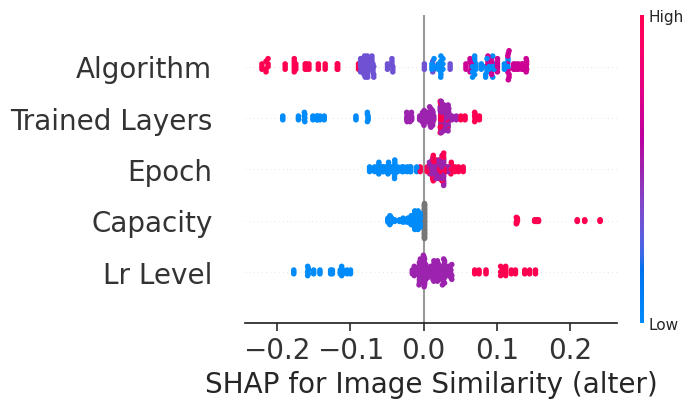

In [50]:
sns.set(font_scale=10)
sns.set_style("white")
shap_values_list = []
# plt.rcParams.update({'font.size': 132})
#plt.rcParams['font.size'] = '1200'

metric = ('Image Similarity', 'DINOv2-padding', 'out')
feature_names = ['Algorithm', 'Trained Layers', 'Epoch', 'Capacity', 'Lr Level']
shap_values = analysis.models[metric]['shap_values']
shap.summary_plot(shap_values,
                  analysis.X_for_plot,
                  feature_names=feature_names,
                  show=False,
                  plot_size=(6, 4),
                  color_bar_label=None,
                  sort=False)
plt.xlabel(f'SHAP for Image Similarity (alter)')
shap_values_list.append(shap_values)

ax = plt.gca()  # Get current axes
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.tight_layout()
save_dir = f"figures/main/"
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, f"{category}_shap_imsimout.png"), bbox_inches='tight')
plt.savefig(os.path.join(save_dir, f"{category}_shap_imsimout.pdf"), bbox_inches='tight',)

## Per category: Scene

In [54]:
category = 'scene'

metrics_aggregated = aggregate_metrics(
    metrics_processed[metrics_processed['Category'] == category],
    level='All',
    group_seeds=False)
print(metrics_aggregated.shape)

(207, 149)


In [58]:
analysis = FeatureAnalysis(metrics_aggregated,
                           keyword=category,
                           drop_step=False)
analysis.fit(metrics_to_include, test_size=None)
analysis.transform_nt()

Fitting ('Image Similarity', 'DINOv2-padding', 'out')
Training performance
RMSE: 0.10
R2: 0.84
Fitting ('Image Similarity', 'DINOv2-padding', 'trigger')
Training performance
RMSE: 0.10
R2: 0.74
Fitting ('Image Similarity', 'DINOv2-padding', 'in')
Training performance
RMSE: 0.10
R2: 0.74
Fitting ('Text Similarity', 'CLIP', 'out')
Training performance
RMSE: 0.07
R2: 0.92
Fitting ('Vendi', 'DINOv2', 'trigger')
Training performance
RMSE: 0.09
R2: 0.80
Fitting ('Style Loss', 'Vgg19', 'base model')
Training performance
RMSE: 0.10
R2: 0.45


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


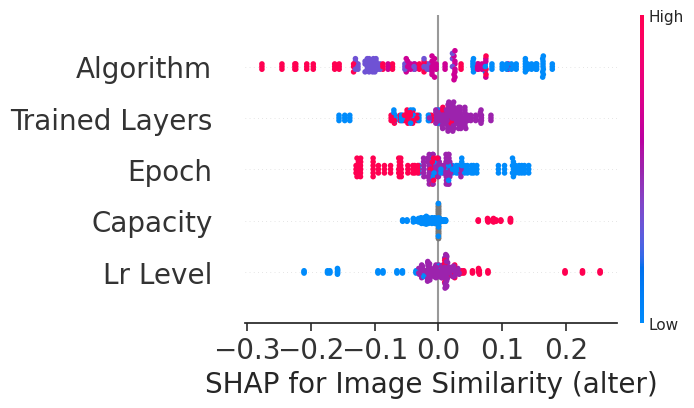

In [59]:
sns.set(font_scale=10)
sns.set_style("white")
shap_values_list = []
# plt.rcParams.update({'font.size': 132})
#plt.rcParams['font.size'] = '1200'

metric = ('Image Similarity', 'DINOv2-padding', 'out')
feature_names = ['Algorithm', 'Trained Layers', 'Epoch', 'Capacity', 'Lr Level']
shap_values = analysis.models[metric]['shap_values']
shap.summary_plot(shap_values,
                  analysis.X_for_plot,
                  feature_names=feature_names,
                  show=False,
                  plot_size=(6, 4),
                  color_bar_label=None,
                  sort=False)
plt.xlabel(f'SHAP for Image Similarity (alter)')
shap_values_list.append(shap_values)

ax = plt.gca()  # Get current axes
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.tight_layout()
save_dir = f"figures/main/"
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, f"{category}_shap_imsimout.png"), bbox_inches='tight')
plt.savefig(os.path.join(save_dir, f"{category}_shap_imsimout.pdf"), bbox_inches='tight',)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


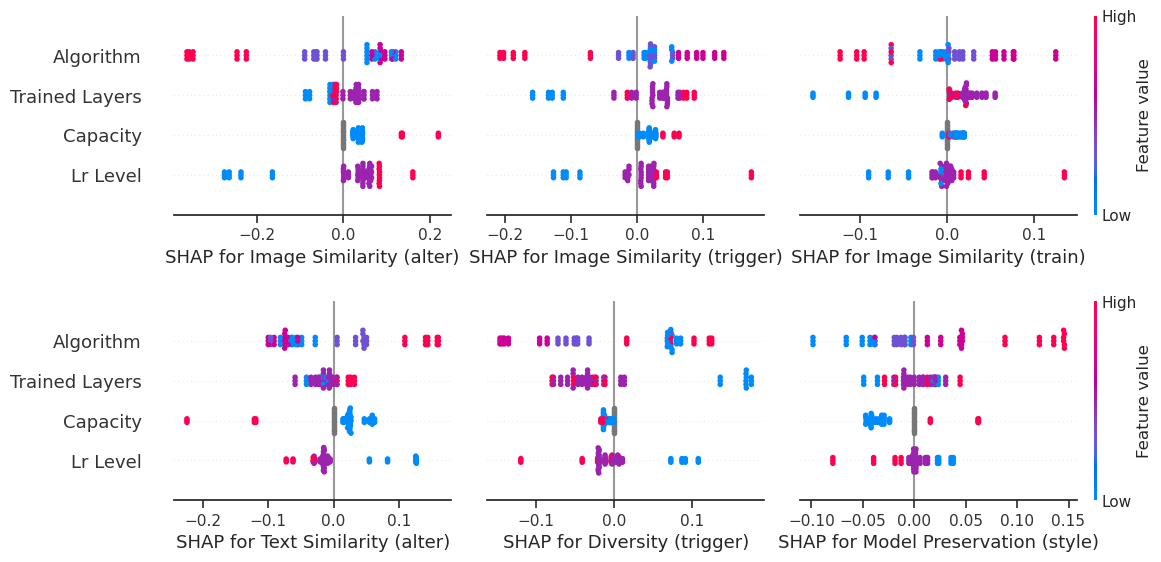

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(24, 12), gridspec_kw={'width_ratios': [1, 1, 1.25]})

shap_values_list = []

for i, metric in enumerate(metrics_to_include):
    plt.subplot(2, 3, i + 1)
    color_bar = (i==2) or (i==5)
    if i != 0 and i != 3:
        feature_names = ['']*5
    else:
        feature_names = ['Algorithm', 'Trained Layers', 'Capacity', 'Lr Level']
    shap_values = analysis.models[metric]['shap_values']
    shap.summary_plot(shap_values,
                      analysis.X_for_plot,
                      feature_names=feature_names,
                      color_bar=color_bar,
                      show=False,
                      plot_size=(12, 6),
                      sort=False)
    plt.xlabel(f'SHAP for {metric_names[i]}')
    shap_values_list.append(shap_values)

plt.tight_layout()
save_dir = f"figures/appendix/"
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, f"{category}_shap.png"))
plt.savefig(os.path.join(save_dir, f"{category}_shap.pdf"))